# Statsmodels

In this notebook, we look at some of the capability of [StatsModels](http://statsmodels.sourceforge.net/), a Python module developed by the Statistics department here at Stanford.

In [107]:
%matplotlib inline

import random

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_context("talk")

# Regression example with Iris data

Let's first look at a linear regression example using the Iris dataset. 
First, we read in the data.

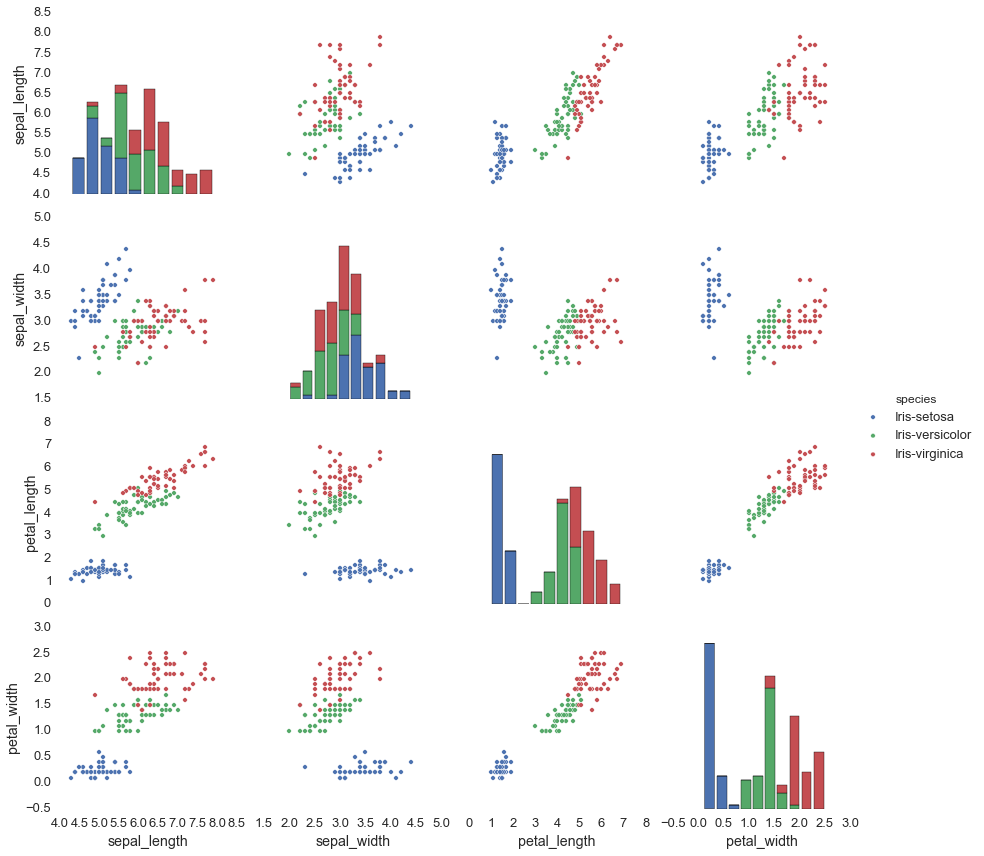

In [108]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

sns.pairplot(iris, hue='species')

## Predicting sepal length

For educational purposes, let's assume that we are intested in predicting the sepal length given the other variables.

We split the data into a training and a test set, so that we can validate the performance on held out data

In [84]:
# number of observations
n = len(iris)
is_train = np.random.rand(n) < 0.7
train = iris[is_train].reset_index(drop=True)
test = iris[~is_train].reset_index(drop=True)

We consider a very simple linear model first, where
$$ \text{sepal_length} = \beta_0 + \beta_1 \text{sepal_width} + \epsilon $$

In [97]:
lin_model = smf.ols('sepal_length ~ sepal_width', train).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.797
Date:                Thu, 07 May 2015   Prob (F-statistic):              0.183
Time:                        13:44:54   Log-Likelihood:                -142.59
No. Observations:                 115   AIC:                             289.2
Df Residuals:                     113   BIC:                             294.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.6603      0.605     11.001      0.000         5.461     7.860
sepal_width    -0.2627      0.196     -1.340      0.183        -0.651     0.126
==============================================================================
Omnibus:                        4.217   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.707
Skew:                           0.184   Prob(JB):                        0.258
Kurtosis:                       2.344   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluating accuracy

Let's compute the RMSE to see how well this model is able to predict sepal lenghts on our test set

In [102]:
def rmse(y, yhat):
    return np.sum((y - yhat)**2)**0.5

preds = lin_model.predict(test)
print 'The RMSE is {}'.format(rmse(test['sepal_length'], preds))

The RMSE is 4.54692739642


### Expanding our model

We can add some more variables to see if we can improve our predictions

In [105]:
lin_model = smf.ols('sepal_length ~ sepal_width + petal_width + petal_length + species', train).fit()
print lin_model.summary()

preds = lin_model.predict(test)
print '\nThe RMSE is {}'.format(rmse(test['sepal_length'], preds))

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 07 May 2015   Prob (F-statistic):           3.58e-47
Time:                        13:56:50   Log-Likelihood:                -24.810
No. Observations:                 115   AIC:                             61.62
Df Residuals:                     109   BIC:                             78.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

We note that we are much better able to predict the sepal length using the extra information we included.

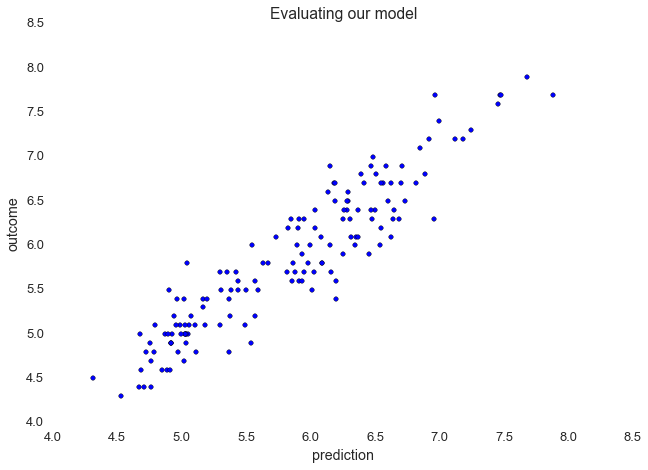

In [113]:
iris['sepal_length_hat'] = lin_model.predict(iris)

f, ax = plt.subplots()

ax.scatter(iris['sepal_length_hat'], iris['sepal_length'])
ax.set_xlabel('prediction')
ax.set_ylabel('outcome')
ax.set_title('Evaluating our model')

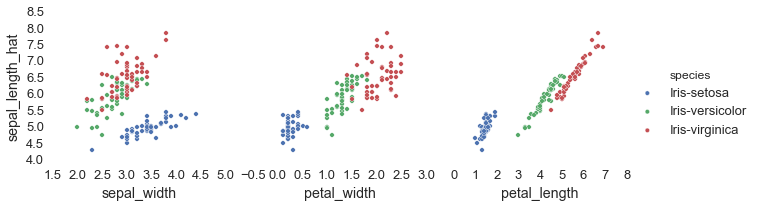

In [118]:
sns.pairplot(iris, hue='species', y_vars=['sepal_length_hat'], x_vars=['sepal_width', 'petal_width', 'petal_length'])

# Logistic regression on the Titanic dataset

Let's also try to predict survival on the titanic using logistic regression.

In [153]:
df = pd.read_csv('data/titanic.csv').drop(['PassengerId', 'Ticket', 'Cabin', 'Age'], 1)
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


We note that there are some missing values:

In [154]:
df.isnull().sum(0)

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

So let's get rid of them:

In [144]:
df = df.dropna()

In [148]:
log_model = smf.logit('Survived ~ C(Pclass) + Sex + C(Pclass):Sex', df).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.448800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 May 2015   Pseudo R-squ.:                  0.3254
Time:                        14:48:57   Log-Likelihood:                -398.98
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 5.452e-81
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      3.3900      0.587      5.775      0.000         2.240     4.541
C(Pclass)[T.2]                -0.9333      0.725     -1.287      0.198        -2.354     0.488
C(Pclass)[T.3]                -3.3900      0.610     -5.556      0.000        -4.586    -2.194
Sex[T.male]                   -3.9272      0.616     -6.373      0.000        -5.135    -2.719
C(Pclass)[T.2]:Sex[T.male]    -0.2072      0.794     -0.261      0.794        -1.764     1.349
C(Pclass)[T.3]:Sex[T.male]     2.0735      0.657      3.154      0.002         0.785     3.362
==============================================================================================
"""

In [149]:
df['Survived_hat'] = log_model.predict(df)

In [150]:
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Survived_hat
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,0.135447
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,0.967391
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,0.500000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,0.967391
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,0.135447
